In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'pyspark'

In [ ]:
from pyspark.sql import SparkSession



In [ ]:
# Create a SparkSession
spark = SparkSession.builder.getOrCreate()



In [695]:
dataset_path = "C:/Users/AlDawlia/Desktop/fueltype.csv"
df = spark.read.csv(dataset_path, header=True, inferSchema=True)

In [696]:
df

DataFrame[_c0: int, brand: string, name: string, bodyType: string, year: int, transmission: string, power: int, fuelType: string]

In [697]:
df = df.select("brand", "bodyType", "year", "transmission", "power", "fuelType")

In [698]:
df

DataFrame[brand: string, bodyType: string, year: int, transmission: string, power: int, fuelType: string]

In [699]:
#preprocessing
print("Data Types:")
df.printSchema()

Data Types:
root
 |-- brand: string (nullable = true)
 |-- bodyType: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- power: integer (nullable = true)
 |-- fuelType: string (nullable = true)



In [700]:
print("Descriptive Statistics:")
df.describe().show()

Descriptive Statistics:
+-------+-------+-------------+------------------+------------+------------------+--------+
|summary|  brand|     bodyType|              year|transmission|             power|fuelType|
+-------+-------+-------------+------------------+------------+------------------+--------+
|  count|1048034|      1048034|            639362|     1042602|           1037869| 1043615|
|   mean|   NULL|         NULL|2005.2700676611998|        NULL|158.68152242720421|    NULL|
| stddev|   NULL|         NULL| 8.219179906978063|        NULL| 71.50729764432751|    NULL|
|    min|  Acura|        coupe|              1953|          AT|                45|  Diesel|
|    max|  Volvo|station wagon|              2021|       Robot|               650|Gasoline|
+-------+-------+-------------+------------------+------------+------------------+--------+



In [701]:
from pyspark.sql.functions import isnan, count, when


In [702]:
# Count null values 
null_counts = df.select([count(when(isnan(c) | df[c].isNull(), c)).alias(c) for c in df.columns])

null_counts.show()

+-----+--------+------+------------+-----+--------+
|brand|bodyType|  year|transmission|power|fuelType|
+-----+--------+------+------------+-----+--------+
|    0|       0|408672|        5432|10165|    4419|
+-----+--------+------+------------+-----+--------+



In [703]:
# Drop rows containing null
df = df.na.drop()
df.show()

+----------+-----------------+----+------------+-----+--------+
|     brand|         bodyType|year|transmission|power|fuelType|
+----------+-----------------+----+------------+-----+--------+
|    Toyota|     jeep 5 doors|1995|          AT|  130|  Diesel|
|    Toyota|hatchback 5 doors|2019|         CVT|   95|Gasoline|
|    Toyota|            sedan|2002|          AT|  160|Gasoline|
|    Toyota|     jeep 5 doors|2010|          AT|  170|Gasoline|
|    Hummer|     jeep 5 doors|2002|          AT|  315|Gasoline|
|Mitsubishi|     jeep 5 doors|2005|         CVT|  170|Gasoline|
|    Subaru|     jeep 5 doors|2015|         CVT|  150|Gasoline|
|    Toyota|     jeep 5 doors|2000|          AT|  185|Gasoline|
|    Subaru|hatchback 5 doors|2011|         CVT|  103|Gasoline|
|    Toyota|     jeep 5 doors|2012|      Manual|  146|Gasoline|
|Mitsubishi|     jeep 5 doors|2010|      Manual|  178|Gasoline|
|     Lexus|     jeep 5 doors|2007|          AT|  383|Gasoline|
|    Toyota|     jeep 3 doors|2005|     

In [704]:

print("Test NaN:")
df.select([count(when(isnan(c) | df[c].isNull(), c)).alias(c) for c in df.columns]).show()

Test NaN:
+-----+--------+----+------------+-----+--------+
|brand|bodyType|year|transmission|power|fuelType|
+-----+--------+----+------------+-----+--------+
|    0|       0|   0|           0|    0|       0|
+-----+--------+----+------------+-----+--------+



In [705]:
df = df.dropDuplicates()

In [706]:
df.show()

+----------+-----------------+----+------------+-----+--------+
|     brand|         bodyType|year|transmission|power|fuelType|
+----------+-----------------+----+------------+-----+--------+
|     Honda|     jeep 5 doors|1997|          AT|  130|Gasoline|
|    Toyota|     jeep 5 doors|2011|          AT|  160|Gasoline|
|    Nissan|            sedan|2014|          AT|  102|Gasoline|
|    Subaru|     jeep 5 doors|2012|         CVT|  150|Gasoline|
| SsangYong|     jeep 5 doors|2007|          AT|  150|Gasoline|
|    Toyota|     jeep 5 doors|2013|          AT|  163|Gasoline|
|Mitsubishi|     jeep 5 doors|2015|          AT|  118|Gasoline|
|     Lexus|     jeep 5 doors|2003|          AT|  230|Gasoline|
|    Suzuki|     jeep 3 doors|2005|          AT|   64|Gasoline|
|     Honda|            sedan|1999|          AT|  148|Gasoline|
|    Subaru|    station wagon|1997|      Manual|  135|Gasoline|
|    Subaru|    station wagon|2002|          AT|  260|Gasoline|
|    Toyota|            sedan|1995|     

In [707]:
print("Duplicates after dropping:")
df.select(df.columns).groupBy(df.columns).count().where("count > 1").show()

Duplicates after dropping:
+-----+--------+----+------------+-----+--------+-----+
|brand|bodyType|year|transmission|power|fuelType|count|
+-----+--------+----+------------+-----+--------+-----+
+-----+--------+----+------------+-----+--------+-----+



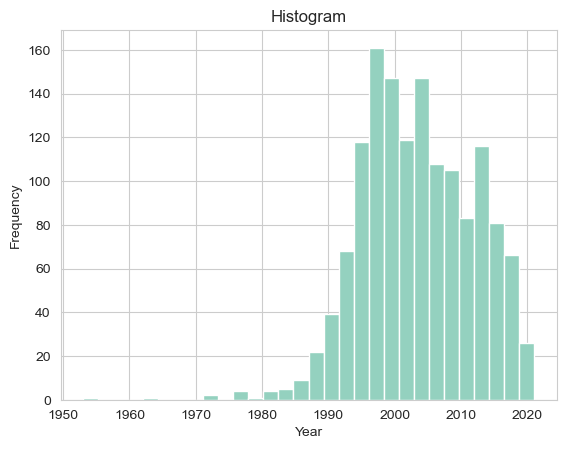

In [708]:
import matplotlib.pyplot as plt
import pandas as pd
df_pandas = df.select('year').toPandas()

# Plot histogram using matplotlib
plt.hist(df_pandas['year'], bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

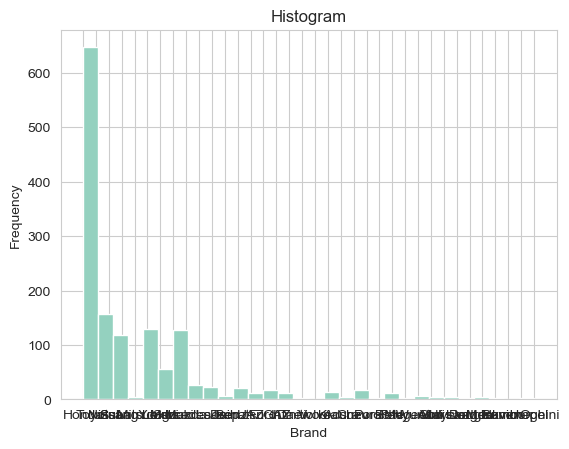

In [709]:
df_pandas = df.select('brand').toPandas()

plt.hist(df_pandas['brand'], bins=30)
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


In [710]:
df.show()

+----------+-----------------+----+------------+-----+--------+
|     brand|         bodyType|year|transmission|power|fuelType|
+----------+-----------------+----+------------+-----+--------+
|     Honda|     jeep 5 doors|1997|          AT|  130|Gasoline|
|    Toyota|     jeep 5 doors|2011|          AT|  160|Gasoline|
|    Nissan|            sedan|2014|          AT|  102|Gasoline|
|    Subaru|     jeep 5 doors|2012|         CVT|  150|Gasoline|
| SsangYong|     jeep 5 doors|2007|          AT|  150|Gasoline|
|    Toyota|     jeep 5 doors|2013|          AT|  163|Gasoline|
|Mitsubishi|     jeep 5 doors|2015|          AT|  118|Gasoline|
|     Lexus|     jeep 5 doors|2003|          AT|  230|Gasoline|
|    Suzuki|     jeep 3 doors|2005|          AT|   64|Gasoline|
|     Honda|            sedan|1999|          AT|  148|Gasoline|
|    Subaru|    station wagon|1997|      Manual|  135|Gasoline|
|    Subaru|    station wagon|2002|          AT|  260|Gasoline|
|    Toyota|            sedan|1995|     

In [711]:
from pyspark.ml.feature import StringIndexer
stringIndexer = StringIndexer(inputCol="brand", outputCol="brandd_indexx")
indexerModel = stringIndexer.fit(df)

df = indexerModel.transform(df)
df.show()

+----------+-----------------+----+------------+-----+--------+-------------+
|     brand|         bodyType|year|transmission|power|fuelType|brandd_indexx|
+----------+-----------------+----+------------+-----+--------+-------------+
|     Honda|     jeep 5 doors|1997|          AT|  130|Gasoline|          3.0|
|    Toyota|     jeep 5 doors|2011|          AT|  160|Gasoline|          0.0|
|    Nissan|            sedan|2014|          AT|  102|Gasoline|          1.0|
|    Subaru|     jeep 5 doors|2012|         CVT|  150|Gasoline|          4.0|
| SsangYong|     jeep 5 doors|2007|          AT|  150|Gasoline|         24.0|
|    Toyota|     jeep 5 doors|2013|          AT|  163|Gasoline|          0.0|
|Mitsubishi|     jeep 5 doors|2015|          AT|  118|Gasoline|          2.0|
|     Lexus|     jeep 5 doors|2003|          AT|  230|Gasoline|          6.0|
|    Suzuki|     jeep 3 doors|2005|          AT|   64|Gasoline|          5.0|
|     Honda|            sedan|1999|          AT|  148|Gasoline| 

In [712]:
from pyspark.sql.functions import col

df = df.withColumn("brandd_indexx", col("brandd_indexx").cast("integer"))

df.show()

+----------+-----------------+----+------------+-----+--------+-------------+
|     brand|         bodyType|year|transmission|power|fuelType|brandd_indexx|
+----------+-----------------+----+------------+-----+--------+-------------+
|     Honda|     jeep 5 doors|1997|          AT|  130|Gasoline|            3|
|    Toyota|     jeep 5 doors|2011|          AT|  160|Gasoline|            0|
|    Nissan|            sedan|2014|          AT|  102|Gasoline|            1|
|    Subaru|     jeep 5 doors|2012|         CVT|  150|Gasoline|            4|
| SsangYong|     jeep 5 doors|2007|          AT|  150|Gasoline|           24|
|    Toyota|     jeep 5 doors|2013|          AT|  163|Gasoline|            0|
|Mitsubishi|     jeep 5 doors|2015|          AT|  118|Gasoline|            2|
|     Lexus|     jeep 5 doors|2003|          AT|  230|Gasoline|            6|
|    Suzuki|     jeep 3 doors|2005|          AT|   64|Gasoline|            5|
|     Honda|            sedan|1999|          AT|  148|Gasoline| 

In [713]:
# Question 1: What are the most common fuel types used in the vehicles listed in the dataset?
from pyspark.sql.functions import col, count, desc

fuel_type_counts = df.groupBy("fuelType").agg(count("*").alias("count"))
most_common_fuel_types = fuel_type_counts.orderBy(desc("count"))

most_common_fuel_types.show()

+--------+-----+
|fuelType|count|
+--------+-----+
|Gasoline| 1254|
|  Diesel|  179|
+--------+-----+



In [714]:
# Question 2: Which brands are most frequently represented in the dataset, and what is the distribution of body types among those brands?
brand_counts = df.groupBy("brand").agg(count("*").alias("count"))
most_frequent_brands = brand_counts.orderBy(desc("count"))

most_frequent_brands.show()

body_type_distribution = df.filter(col("brand").isin([row.brand for row in most_frequent_brands.limit(5).collect()])) \
    .groupBy("brand", "bodyType").agg(count("*").alias("count"))

body_type_distribution.show()

+-------------+-----+
|        brand|count|
+-------------+-----+
|       Toyota|  525|
|       Nissan|  157|
|   Mitsubishi|  129|
|        Honda|  122|
|       Subaru|  118|
|       Suzuki|   89|
|        Lexus|   56|
|        Mazda|   38|
|Mercedes-Benz|   26|
|         Lada|   22|
|     Daihatsu|   20|
|          Kia|   13|
|         Ford|   13|
|     Infiniti|   12|
|        Isuzu|   12|
|          BMW|   11|
|          UAZ|   11|
|         Jeep|    7|
|      Hyundai|    7|
|    Chevrolet|    5|
+-------------+-----+
only showing top 20 rows

+----------+-----------------+-----+
|     brand|         bodyType|count|
+----------+-----------------+-----+
|    Nissan|           pickup|    7|
|    Nissan|     jeep 5 doors|   53|
|    Subaru|     jeep 5 doors|   38|
|     Honda|     jeep 3 doors|    7|
|    Subaru|    station wagon|   35|
|    Subaru|          minivan|    1|
|    Toyota|            sedan|  156|
|     Honda|          minivan|   13|
|     Honda|            coupe|    1|
| 

In [715]:
# Question 3: Is there a relationship between the transmission type and the production year of the vehicles in terms of their frequency?
transmission_year_counts = df.groupBy("transmission", "year").agg(count("*").alias("count"))

transmission_year_counts.show()

+------------+----+-----+
|transmission|year|count|
+------------+----+-----+
|          AT|2014|   12|
|      Manual|2004|    3|
|      Manual|1964|    1|
|          AT|1987|    1|
|          AT|1997|   67|
|         CVT|2015|   23|
|         CVT|2000|    4|
|      Manual|2011|    5|
|      Manual|1995|   11|
|          AT|1986|    2|
|      Manual|2001|    3|
|          AT|2017|   11|
|          AT|1981|    1|
|      Manual|2000|   11|
|      Manual|2012|    5|
|          AT|1990|   10|
|      Manual|1997|   20|
|         CVT|2002|    6|
|      Manual|2020|    1|
|      Manual|1983|    3|
+------------+----+-----+
only showing top 20 rows



In [716]:
#decision tree model1
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [717]:
# Index String Columns (if any)
# Assuming 'brand' and 'transmission' are string columns, if not skip this part
indexers = [
    StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) 
    for column in ['brand', 'bodyType', 'transmission']
]
# Apply StringIndexer to DataFrame
for indexer in indexers:
    df = indexer.transform(df)

In [718]:

# Assemble Features
# Exclude the label column 'fuelType' and use the indexed columns if applicable
assembler = VectorAssembler(
    inputCols=['brand_index', 'bodyType_index', 'transmission_index', 'year'], 
    outputCol='features'
)

df = assembler.transform(df)
# Prepare final DataFrame for training
final_df = df.select('features', 'fuelType')


In [719]:
final_df = df.select('features', 'fuelType')

# Index the label column
label_indexer = StringIndexer(inputCol='fuelType', outputCol='label').fit(final_df)
final_df = label_indexer.transform(final_df)

train_df, test_df = final_df.randomSplit([0.8, 0.2], seed=42)


In [720]:


# Train Decision Tree Classifier with increased maxBins
dt = DecisionTreeClassifier(labelCol='label', featuresCol='features', impurity='entropy', maxBins=40)
dt_model = dt.fit(train_df)

# Predict on test data
predictions = dt_model.transform(test_df)

In [721]:
evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9068825910931174


In [722]:
#KNN
!pip install pyspark pandas scikit-learn


In [723]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [724]:
final_df = df.select('features', 'fuelType')

label_indexer = StringIndexer(inputCol='fuelType', outputCol='label').fit(final_df)
final_df = label_indexer.transform(final_df)

train_df, test_df = final_df.randomSplit([0.8, 0.2], seed=42)

train_pd = train_df.toPandas()
test_pd = test_df.toPandas()



In [725]:
x_train = list(train_pd['features'])
y_train = train_pd['label']
x_test = list(test_pd['features'])
y_test = test_pd['label']

In [726]:
import numpy as np
x_train = np.array([np.array(x) for x in x_train])
x_test = np.array([np.array(x) for x in x_test])

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.8744939271255061


In [735]:
#KMean model3

pipeline = Pipeline(stages=indexers + [assembler])


data = pipeline.fit(df).transform(df)

# Select features
data = data.select(col("features"))

data.show(10)

Py4JJavaError: An error occurred while calling o54088.fit.
: org.apache.spark.SparkException: Input column Country does not exist.
	at org.apache.spark.ml.feature.StringIndexerBase.$anonfun$validateAndTransformSchema$2(StringIndexer.scala:128)
	at scala.collection.TraversableLike.$anonfun$flatMap$1(TraversableLike.scala:293)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at scala.collection.TraversableLike.flatMap(TraversableLike.scala:293)
	at scala.collection.TraversableLike.flatMap$(TraversableLike.scala:290)
	at scala.collection.mutable.ArrayOps$ofRef.flatMap(ArrayOps.scala:198)
	at org.apache.spark.ml.feature.StringIndexerBase.validateAndTransformSchema(StringIndexer.scala:123)
	at org.apache.spark.ml.feature.StringIndexerBase.validateAndTransformSchema$(StringIndexer.scala:115)
	at org.apache.spark.ml.feature.StringIndexer.validateAndTransformSchema(StringIndexer.scala:145)
	at org.apache.spark.ml.feature.StringIndexer.transformSchema(StringIndexer.scala:252)
	at org.apache.spark.ml.PipelineStage.transformSchema(Pipeline.scala:71)
	at org.apache.spark.ml.feature.StringIndexer.fit(StringIndexer.scala:237)
	at org.apache.spark.ml.feature.StringIndexer.fit(StringIndexer.scala:145)
	at jdk.internal.reflect.GeneratedMethodAccessor157.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)


In [728]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(k=3, seed=42, featuresCol="featuresss")
kmeans_model = kmeans.fit(data)

kmeans_predictions = kmeans_model.transform(data)

evaluator = ClusteringEvaluator(featuresCol="featuresss", metricName="silhouette", distanceMeasure="squaredEuclidean")

silhouette = evaluator.evaluate(kmeans_predictions)
print(f"Silhouette with squared Euclidean distance = {silhouette}")

kmeans_predictions.show(10)

Silhouette with squared Euclidean distance = 0.6427352741102005
+--------------------+----------+
|          featuresss|prediction|
+--------------------+----------+
|(5,[0,4],[3.0,199...|         1|
|    (5,[4],[2011.0])|         2|
|[1.0,1.0,0.0,0.0,...|         2|
|[4.0,0.0,1.0,0.0,...|         2|
|(5,[0,4],[24.0,20...|         0|
|    (5,[4],[2013.0])|         2|
|(5,[0,4],[2.0,201...|         2|
|(5,[0,4],[6.0,200...|         1|
|[5.0,4.0,0.0,0.0,...|         2|
|[3.0,1.0,0.0,0.0,...|         1|
+--------------------+----------+
only showing top 10 rows

